## STL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1st Case

In [ ]:
airline = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


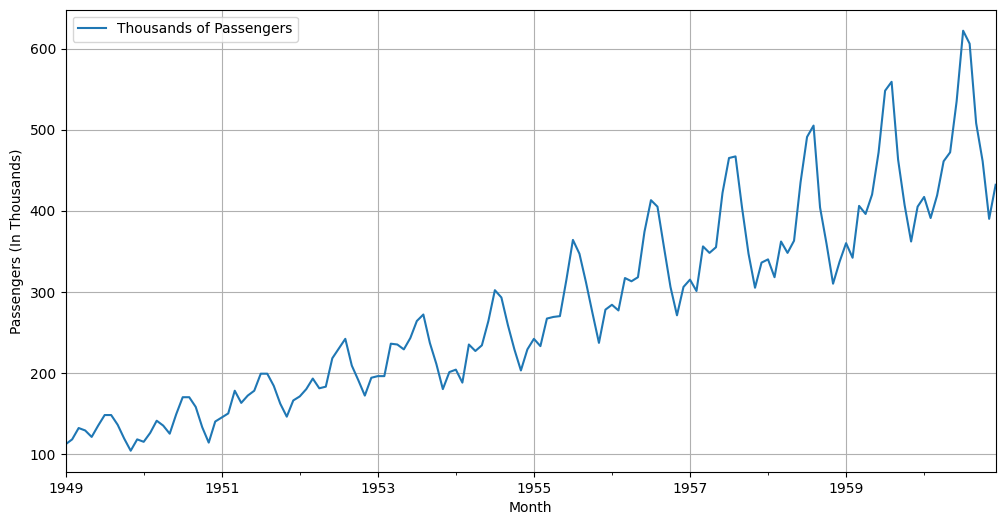

In [ ]:
airline.plot(figsize = (12, 6), ylabel = 'Passengers (In Thousands)');
plt.grid()

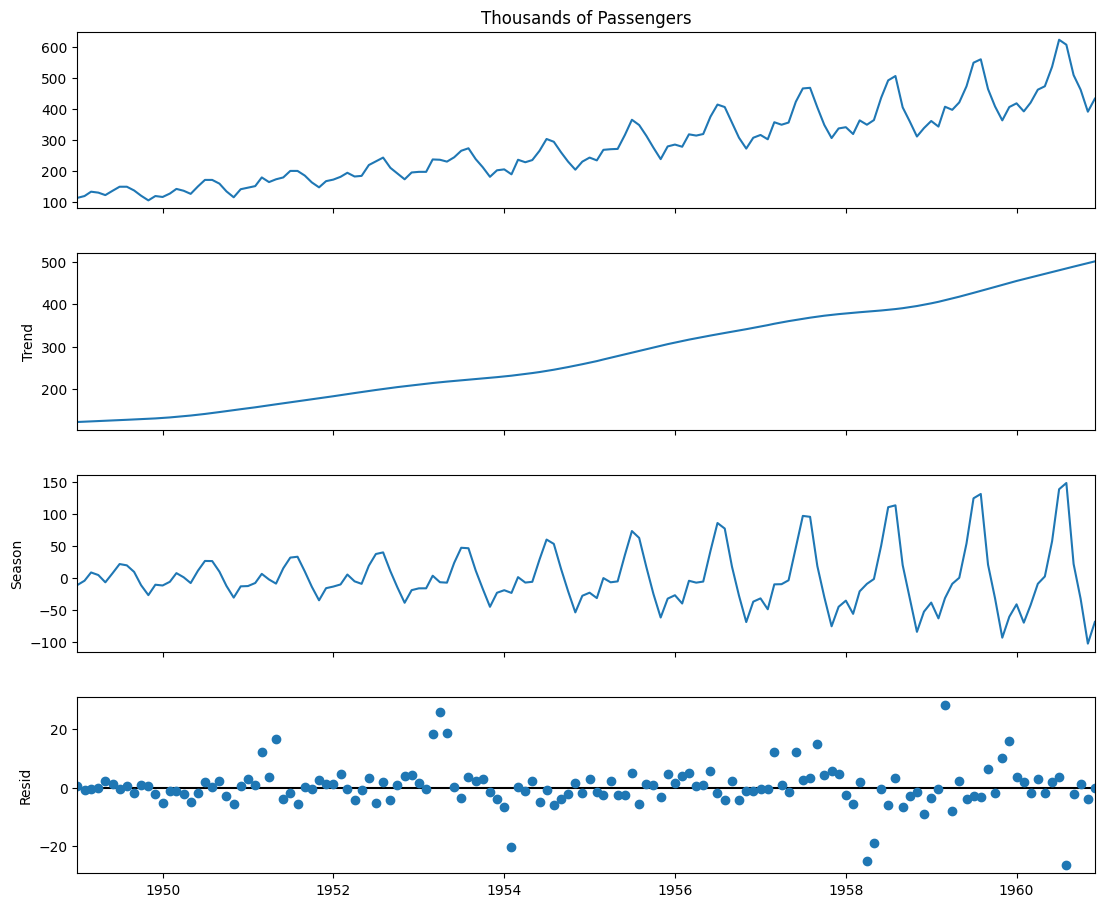

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(airline["Thousands of Passengers"], period = 12, robust = True)  # Robust = better handling of outliers
decomp_stl = stl.fit()

# Increase figure size
fig = decomp_stl.plot();
fig.set_size_inches(12, 10)  # Width = 12 inches, Height = 8 inches
plt.show()

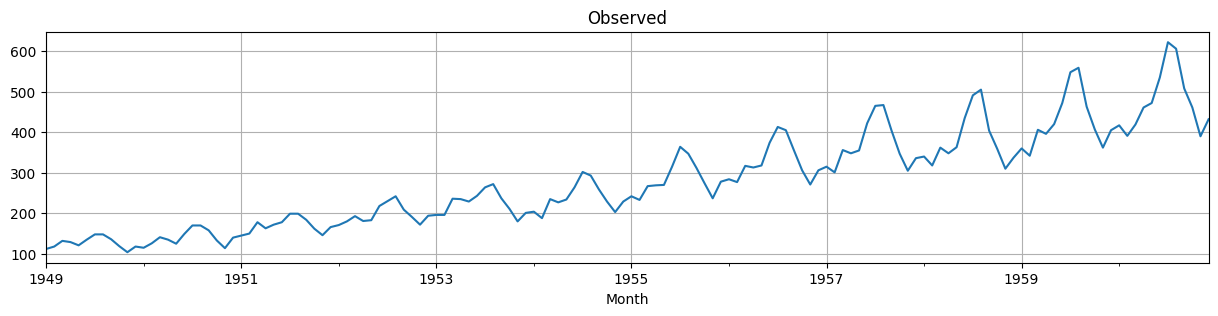

In [ ]:
# Individual Graphs (Observed)

decomp_stl.observed.plot(figsize = (15,3))
plt.title('Observed')
plt.grid()
plt.show()

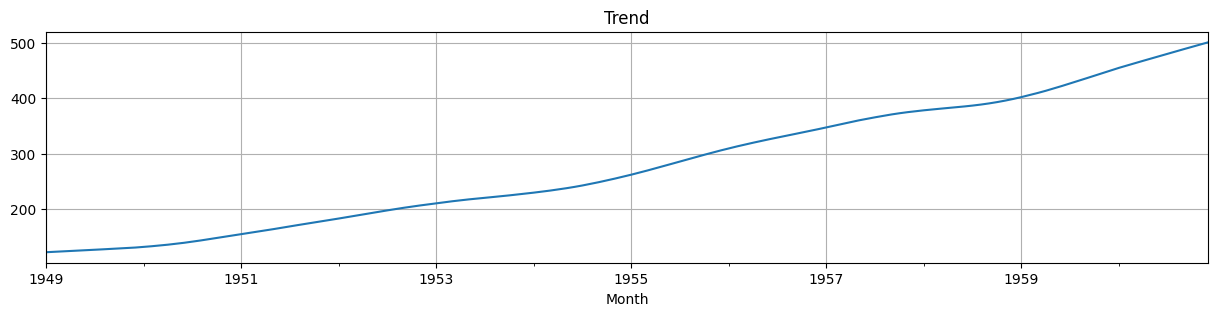

In [ ]:
# Individual Graphs (Trend)

decomp_stl.trend.plot(figsize = (15,3))
plt.title('Trend')
plt.grid()
plt.show()

In [ ]:
# The trend line shows a consistent upward trend, indicating long-term growth in airline passenger numbers.
# The trend is smooth, capturing the increasing demand over time.

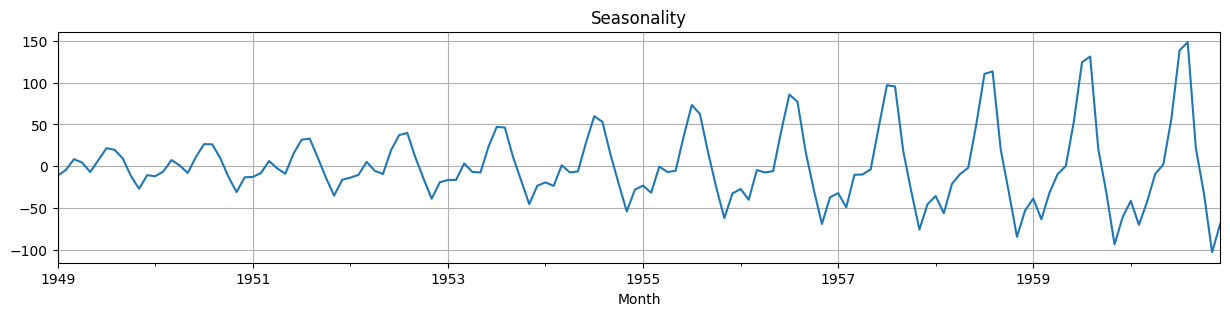

In [ ]:
# Individual Graphs (Seasonal)

decomp_stl.seasonal.plot(figsize = (15,3))
plt.title('Seasonality')
plt.grid()
plt.show()

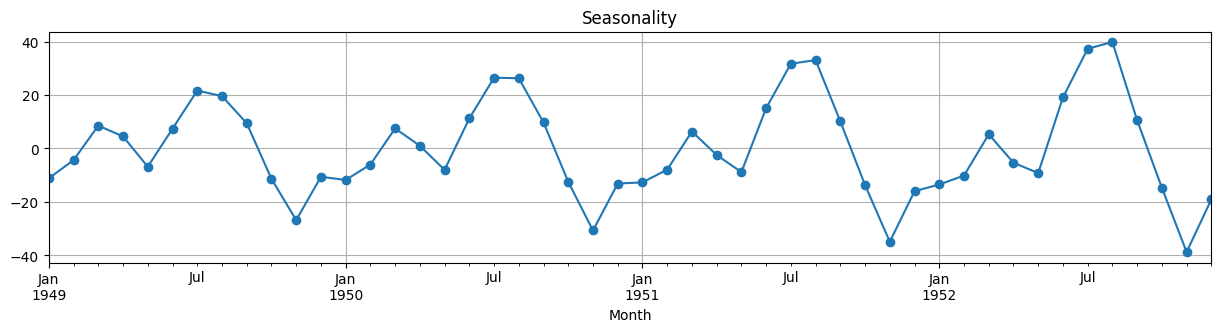

In [ ]:
# Seasonality (Zoomed In)

decomp_stl.seasonal[:48].plot(figsize = (15,3), marker = 'o')
plt.title('Seasonality')
plt.grid()
plt.show()

In [ ]:
# The seasonal component displays a strong repeating pattern every 12 months.
# This confirms that seasonality is well-defined and occurs annually.

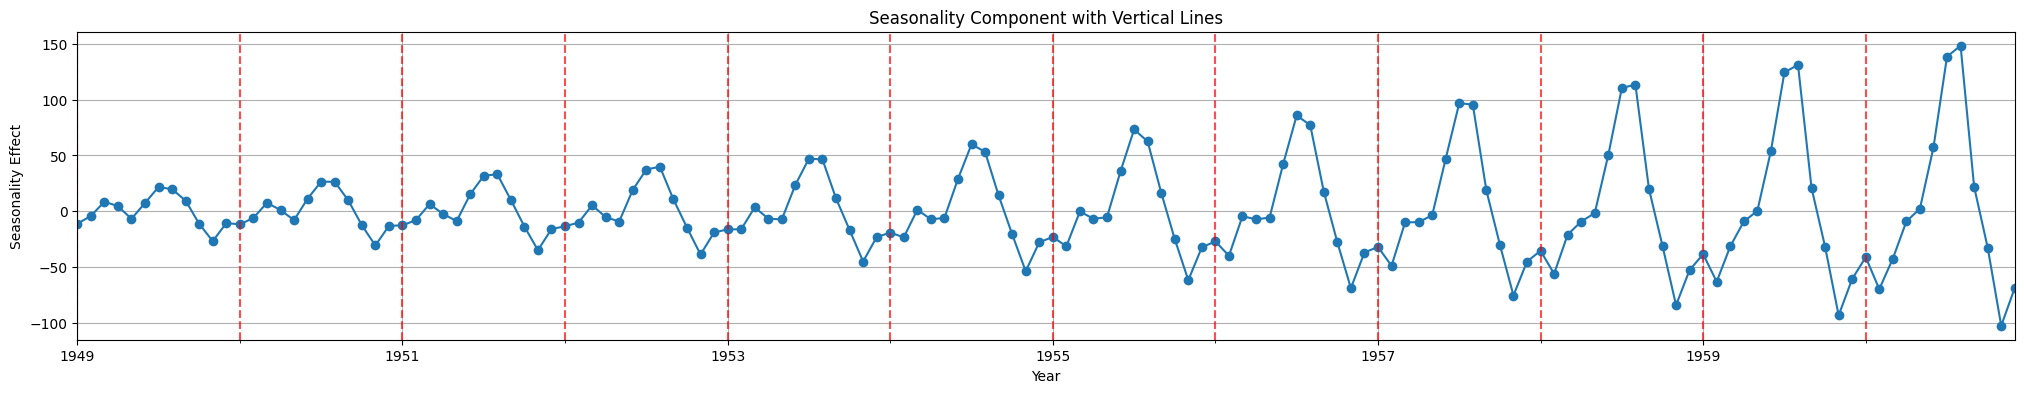

In [ ]:
# Plot STL decomposition with vertical lines every 12 months

fig, ax = plt.subplots(figsize=(25, 4))
decomp_stl.seasonal.plot(ax = ax, title='Seasonality Component with Vertical Lines', marker = 'o')

# Add vertical lines every 12 months
for i in range(0, len(airline), 12):

    ax.axvline(airline.index[i], color='red', linestyle='--', alpha=0.7)

plt.xlabel("Year")
plt.ylabel("Seasonality Effect")
plt.grid(True)
plt.show()

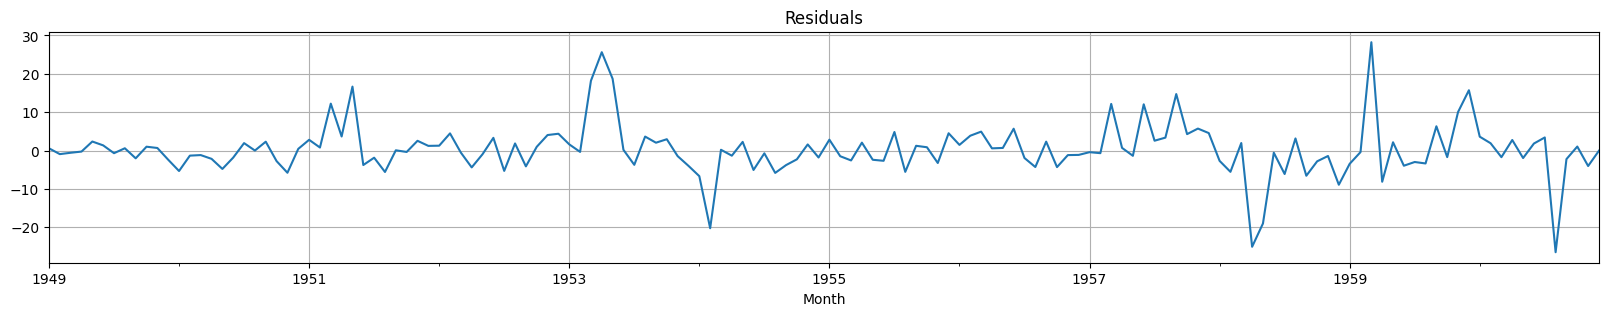

In [ ]:
# Individual Graphs (Residual/Error)

decomp_stl.resid.plot(figsize = (20,3))
plt.title('Residuals')
plt.grid()
plt.show()

In [ ]:
# The residuals are relatively small and mostly centered around zero.
# The residuals do not exhibit strong structure (no visible patterns), confirming that the STL decomposition
# has successfully extracted trend and seasonality.

#### Comparative Graphs

In [ ]:
# Apply ETS Decomposition (Additive Model)

from statsmodels.tsa.seasonal import seasonal_decompose

# ETS
decomp_ets = seasonal_decompose(airline["Thousands of Passengers"], model = "multiplicative", period = 12)

# STL
stl = STL(airline["Thousands of Passengers"], period = 12, robust = True)  # Robust = better handling of outliers
decomp_stl = stl.fit()

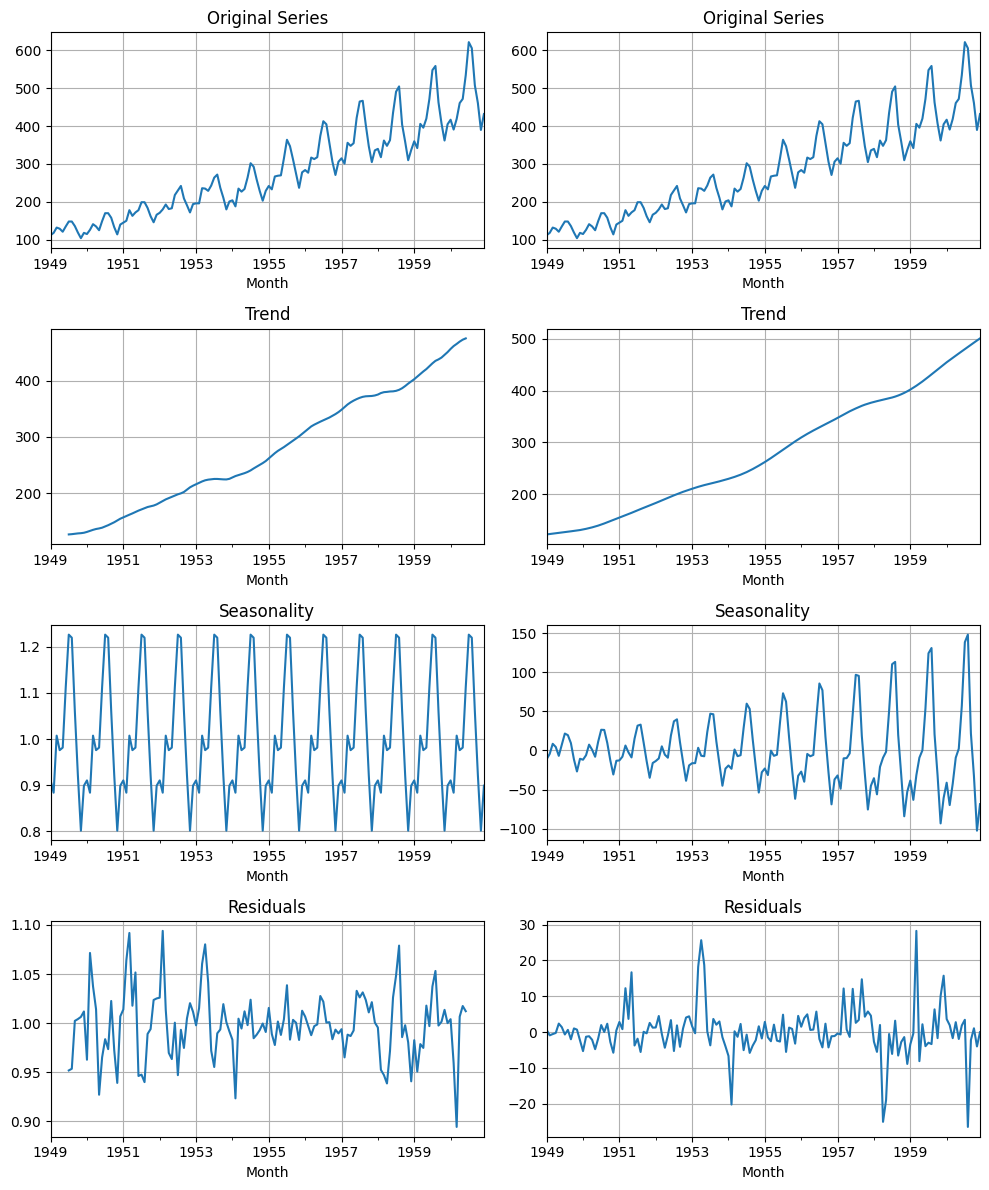

In [ ]:
# Side by Side Comparisons

# Plot ETS and STL Decomposition Side-by-Side
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

# Titles for both models
titles = ["Original Series", "Trend", "Seasonality", "Residuals"]

# Plot ETS Decomposition (Left/Side)
components_ets = [airline["Thousands of Passengers"], decomp_ets.trend, decomp_ets.seasonal, decomp_ets.resid]
for i, component in enumerate(components_ets):

    component.plot(ax = axes[i, 0], title = titles[i])
    axes[i, 0].grid()

# Plot STL Decomposition (Right/Side)
components_stl = [airline["Thousands of Passengers"], decomp_stl.trend, decomp_stl.seasonal, decomp_stl.resid]
for i, component in enumerate(components_stl):

    component.plot(ax = axes[i, 1], title = titles[i])
    axes[i, 1].grid()

plt.tight_layout()
plt.show()


### 2nd Case

In [ ]:
ts_sensor = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/ts_no_pattern.csv',index_col='Date', parse_dates=True)
ts_sensor.head()

,Value
Date,
2000-01-31,104.967142
2000-02-29,98.617357
2000-03-31,106.476885
2000-04-30,115.230299
2000-05-31,97.658466


In [ ]:
#  STL decomposition with a 12-month seasonal period (checking for yearly seasonality)

stl = STL(ts_sensor['Value'], period = 12, robust = True)
stl_decomposition = stl.fit()

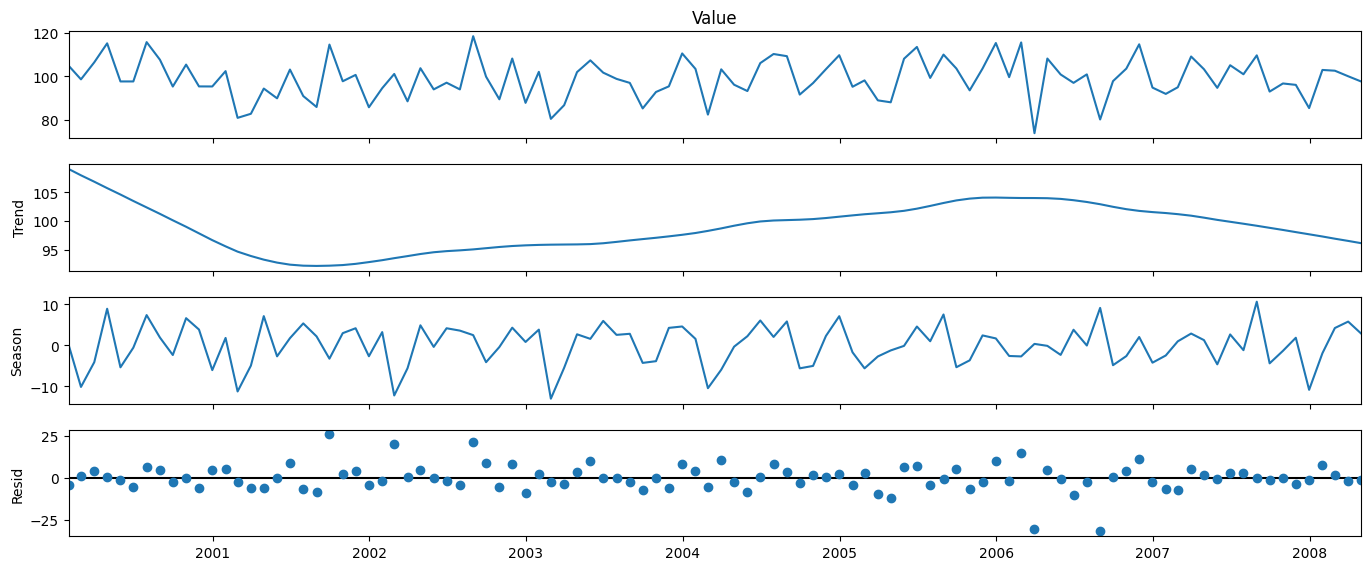

In [ ]:
# STL Graphs

fig = stl_decomposition.plot()
fig.set_size_inches(15, 6)
plt.show()

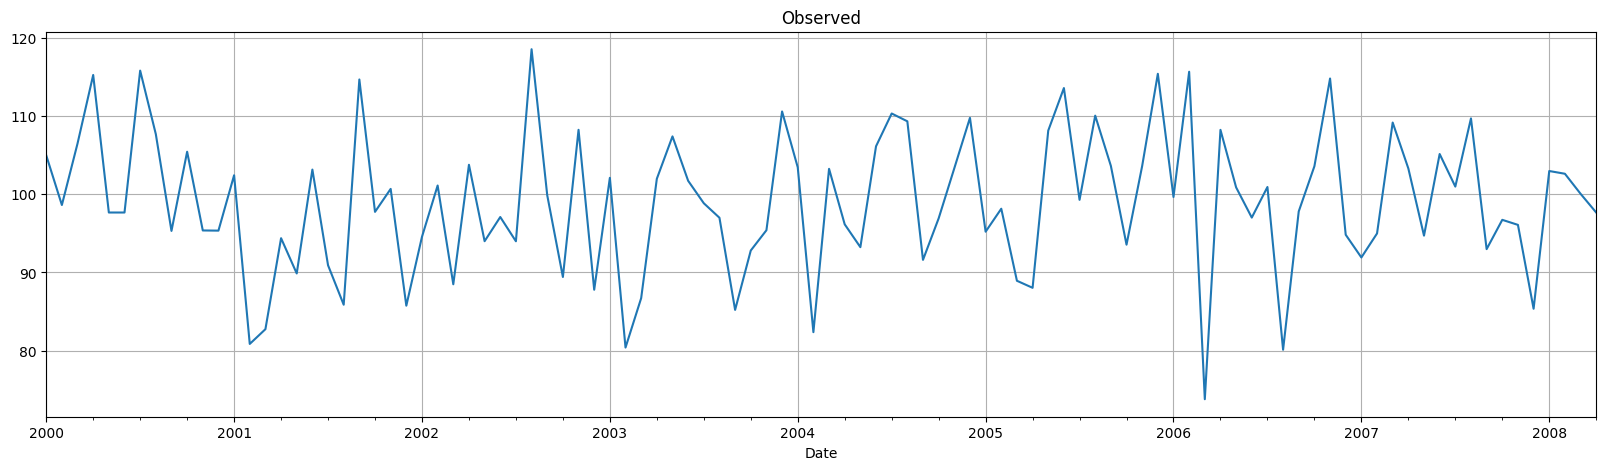

In [ ]:
# Observed

fig = stl_decomposition.observed.plot(figsize = (20, 5))
plt.title('Observed')
plt.grid()
plt.show()

In [ ]:
# The original time series shows random fluctuations without any clear pattern.

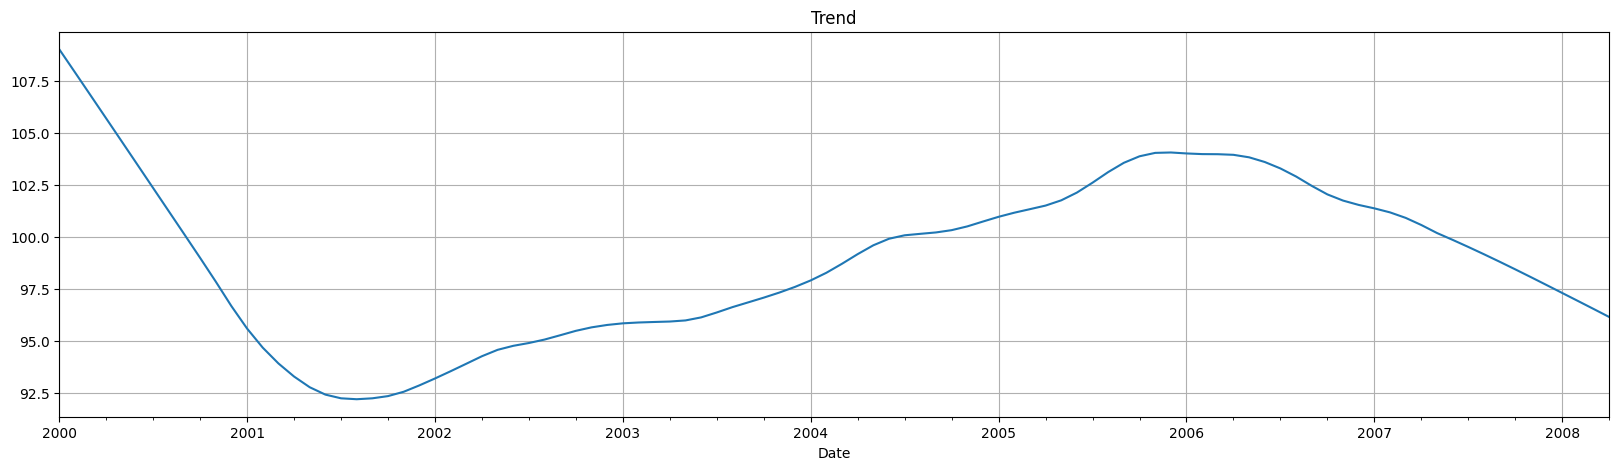

In [ ]:
# Trend

fig = stl_decomposition.trend.plot(figsize = (20, 5))
plt.title('Trend')
plt.grid()
plt.show()

In [ ]:
# The trend component is unstable and fluctuates without a clear direction.
# This indicates that no consistent upward or downward trend exists.

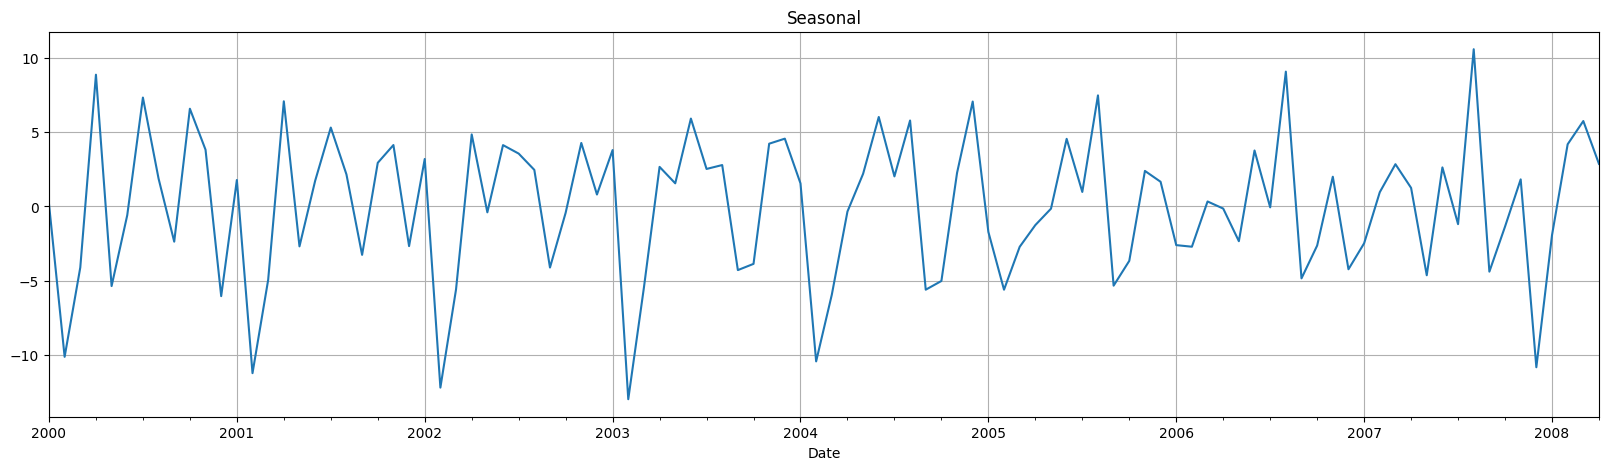

In [ ]:
# Seasonality

fig = stl_decomposition.seasonal.plot(figsize = (20, 5))
plt.title('Seasonal')
plt.grid()
plt.show()

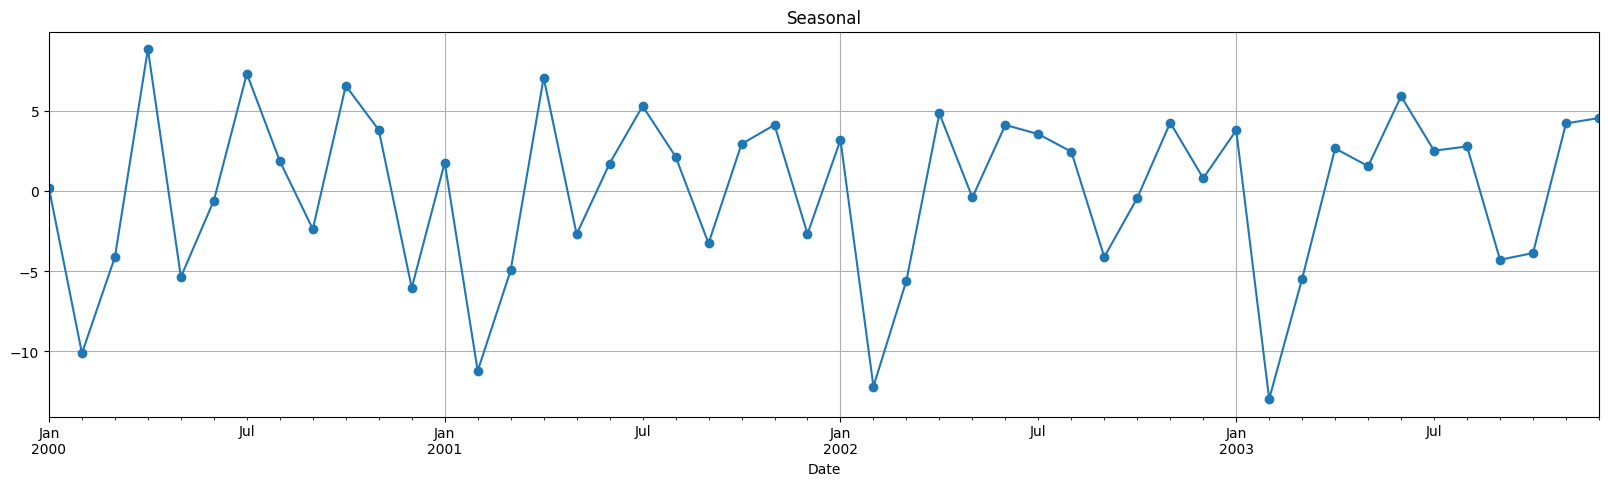

In [ ]:
# Seasonality (Zoomed In)

fig = stl_decomposition.seasonal[:48].plot(figsize = (20, 5), marker = 'o')
plt.title('Seasonal')
plt.grid()
plt.show()

In [ ]:
# The seasonal component appears random rather than showing a repeating cycle.
# This confirms that no meaningful seasonality exists.
# Unlike ETS decomposition, STL does not try to force a seasonal pattern where there is none.

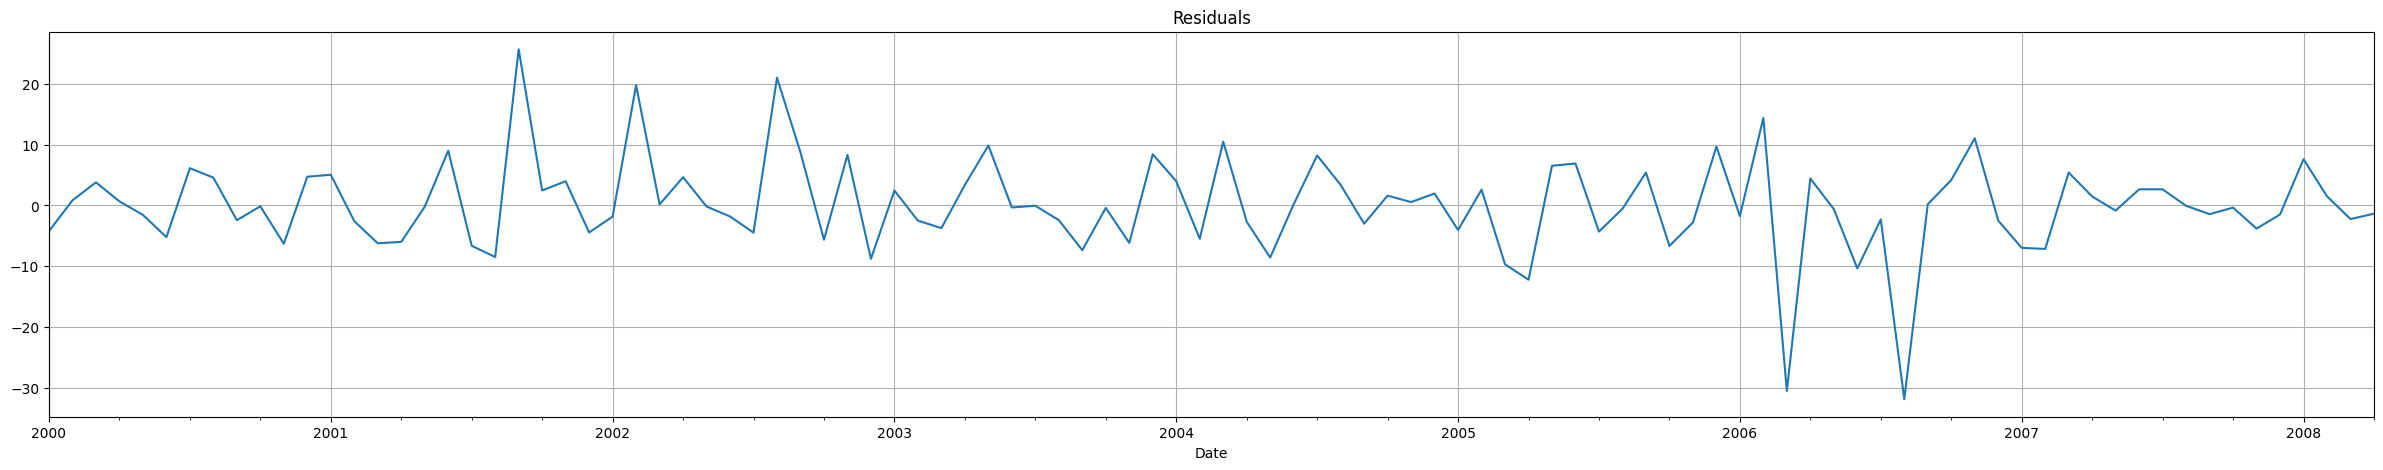

In [ ]:
# Residuals

fig = stl_decomposition.resid.plot(figsize = (30, 5))
plt.title('Residuals')
plt.grid()
plt.show()

In [ ]:
# The residuals behave like pure noise, meaning all variation in the dataset is random.
# This reinforces that there is no hidden structure in the data.

In [ ]:
# STL decomposition clearly reveals that there is no seasonality in this dataset.

#### Side by Side Comparison

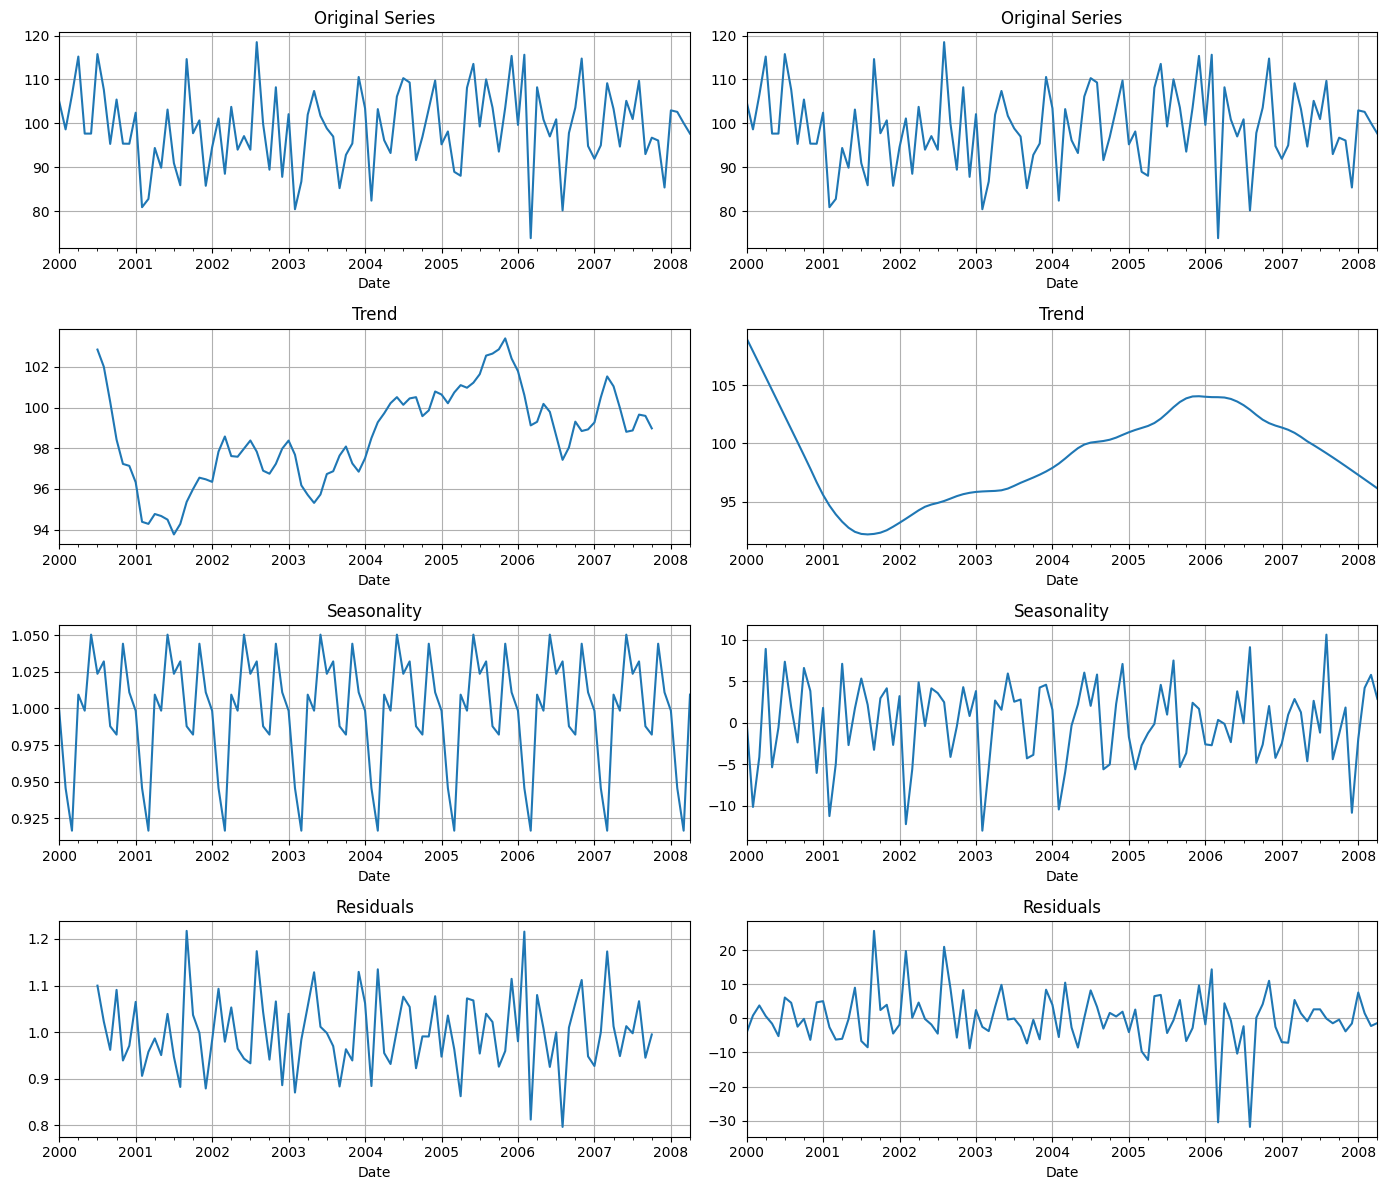

In [ ]:
# Side by Side Comparisons

decomp_ets = seasonal_decompose(ts_sensor["Value"], model="multiplicative", period = 12)
stl = STL(ts_sensor["Value"], period = 12, robust = True)  # Robust = better handling of outliers
decomp_stl = stl.fit()

# Plot ETS and STL Decomposition Side-by-Side
fig, axes = plt.subplots(4, 2, figsize=(14, 12))

# Titles for both models
titles = ["Original Series", "Trend", "Seasonality", "Residuals"]

# Plot ETS Decomposition (Left/Side)
components_ets = [ts_sensor["Value"], decomp_ets.trend, decomp_ets.seasonal, decomp_ets.resid]
for i, component in enumerate(components_ets):

    component.plot(ax = axes[i, 0], title = titles[i])
    axes[i, 0].grid()

# Plot STL Decomposition (Right/Side)
components_stl = [ts_sensor["Value"], decomp_stl.trend, decomp_stl.seasonal, decomp_stl.resid]
for i, component in enumerate(components_stl):

    component.plot(ax = axes[i, 1], title = titles[i])
    axes[i, 1].grid()

plt.tight_layout()
plt.show()

### Alternative Method for Seasonality

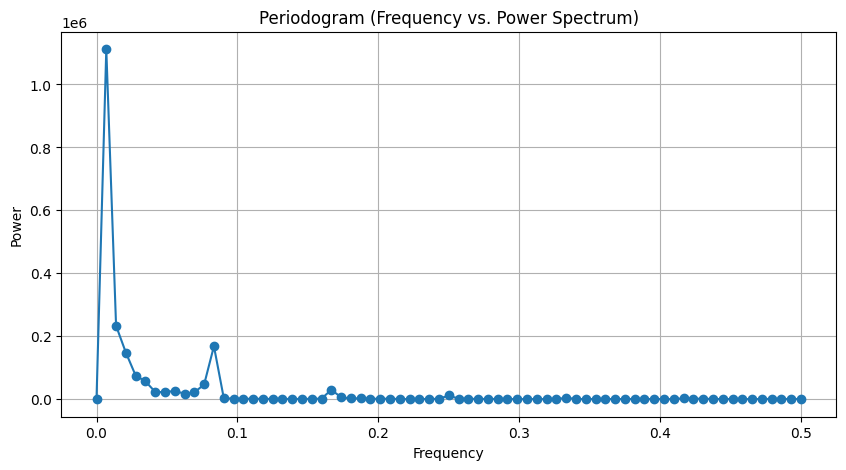

In [ ]:
# Other Methods for Seasonality (Periodogram)

from scipy.signal import periodogram

# Compute the periodogram
frequencies, power = periodogram(airline['Thousands of Passengers'])

# Plot the periodogram

plt.figure(figsize=(10, 5))
plt.plot(frequencies, power, marker='o', linestyle='-')
plt.title("Periodogram (Frequency vs. Power Spectrum)")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.grid(True)
plt.show()

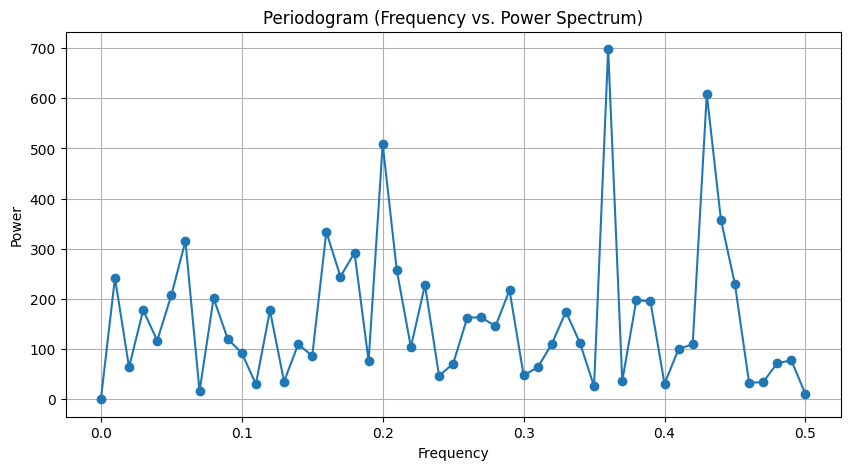

In [ ]:
# Compute the periodogram
frequencies, power = periodogram(ts_sensor['Value'])

# Plot the periodogram

plt.figure(figsize=(10, 5))
plt.plot(frequencies, power, marker='o', linestyle='-')
plt.title("Periodogram (Frequency vs. Power Spectrum)")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.grid(True)
plt.show()